# Data preparation and analysis


## Imports

In [119]:
# Imports
%matplotlib inline
import gzip
import shutil
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from mapping_gff3 import MappingGff3
import xml.etree.ElementTree as et
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import random
from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import consensus_score
import itertools
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.manifold import MDS, TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import OPTICS
from scipy.stats import kstest
from scipy.stats import lognorm
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import time
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

## Load data


### Load gene vs. sample data

In [3]:
IntVeld2022_data_path = 'Data/IntVeld2022'
file_in = f"{IntVeld2022_data_path}/TEP_Count_Matrix.tsv.gz"
file_out = f"{IntVeld2022_data_path}/TEP_Count_Matrix.tsv"

with gzip.open(file_in, 'rb') as f_in:
    with open(file_out, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [4]:
data_df = pd.read_csv(file_out, sep='\t')
print(data_df.shape)
data_df.head(5)

(5440, 2351)


,1-Vumc-HD-101-TR922,2-Vumc-HD-103-TR923,3-Vumc-HD-108-TR924,4-Vumc-HD-127-TR925,5-Vumc-HD-130-TR926,6-Vumc-HD-142-TR927,7-Vumc-HD-143-TR928,8-Vumc-HD-144-TR929,9-Vumc-HD-145-TR930,11-Vumc-HD-149-TR932,...,countMatrix.3502-NKI-4854-SARC-TR3080,countMatrix.3503-NKI-4707-SARC-TR3079,countMatrix.3504-NKI-4941-SARC-TR3084,countMatrix.3507-NKI-6348-SARC-TR3134,countMatrix.3508-NKI-5275-SARC-TR3099,countMatrix.3512-NKI-5148-SARC-TR3129,countMatrix.320-10,countMatrix.327-34,countMatrix.376-P-PH-001-013-TR1400,countMatrix.506-NKI-NSCLC-107-270
ENSG00000000419,5,79,58,128,93,12,0,0,18,28,...,3,0,1,2,9,16,22,21,0,1
ENSG00000000460,8,10,21,14,6,8,25,42,5,7,...,0,3,0,2,63,3,3,0,1,0
ENSG00000000938,24,336,334,59,120,22,31,13,19,36,...,8,45,1,7,163,90,46,75,14,8
ENSG00000001036,38,46,15,36,25,43,27,27,59,5,...,1,3,4,15,3,6,10,8,3,0
ENSG00000001461,72,17,11,9,18,28,5,6,49,18,...,1,1,0,0,12,2,6,6,1,0


In [5]:
data_df.describe()

,1-Vumc-HD-101-TR922,2-Vumc-HD-103-TR923,3-Vumc-HD-108-TR924,4-Vumc-HD-127-TR925,5-Vumc-HD-130-TR926,6-Vumc-HD-142-TR927,7-Vumc-HD-143-TR928,8-Vumc-HD-144-TR929,9-Vumc-HD-145-TR930,11-Vumc-HD-149-TR932,...,countMatrix.3502-NKI-4854-SARC-TR3080,countMatrix.3503-NKI-4707-SARC-TR3079,countMatrix.3504-NKI-4941-SARC-TR3084,countMatrix.3507-NKI-6348-SARC-TR3134,countMatrix.3508-NKI-5275-SARC-TR3099,countMatrix.3512-NKI-5148-SARC-TR3129,countMatrix.320-10,countMatrix.327-34,countMatrix.376-P-PH-001-013-TR1400,countMatrix.506-NKI-NSCLC-107-270
count,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,...,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000
mean,416.658088,306.222059,200.325551,195.664706,237.270037,334.639706,341.358272,252.479228,394.240809,245.939706,...,8.734191,20.176471,10.531985,68.953676,72.238235,45.864338,60.372794,58.598346,26.045956,12.340257
std,3066.455618,1793.920257,952.352515,1038.835194,1730.393051,3177.352322,3628.050653,2653.946262,3450.241199,2257.938852,...,42.144076,95.671902,61.385799,632.827481,240.796406,167.926359,279.658516,280.009581,159.463452,69.402550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,38.000000,28.000000,15.000000,16.000000,10.000000,9.000000,7.000000,12.000000,10.000000,...,1.000000,2.000000,1.000000,0.000000,13.000000,7.000000,7.000000,7.000000,2.000000,0.000000
50%,46.000000,79.000000,57.000000,40.000000,39.000000,32.000000,32.000000,23.000000,37.000000,30.000000,...,2.000000,6.000000,2.000000,7.000000,30.000000,16.000000,17.000000,16.000000,6.000000,2.000000
75%,155.000000,175.250000,127.250000,106.000000,106.000000,113.000000,105.000000,82.000000,131.000000,92.000000,...,6.000000,14.000000,6.000000,25.000000,63.000000,36.000000,43.000000,39.000000,15.000000,7.000000
max,145767.000000,84007.000000,34436.000000,34350.000000,67053.000000,170113.000000,203036.000000,121701.000000,149776.000000,117896.000000,...,1942.000000,3794.000000,2481.000000,27572.000000,9134.000000,6704.000000,14273.000000,10810.000000,6394.000000,2576.000000


In [6]:
# Count missing values
data_df.isna().sum().sum()

0

In [7]:
# Count equal values 0 (0 number of genes in the sample)
data_df.isin([0]).sum(axis=1).sum()

1134949

### TMM normalization.

In [8]:
file_out = f"{IntVeld2022_data_path}/TEP_Count_Matrix_tmm.csv"
df_genes_normalized = pd.read_csv(file_out, sep= '\t')
print(df_genes_normalized.shape)
df_genes_normalized.head(5)

(5440, 2351)


,1-Vumc-HD-101-TR922,2-Vumc-HD-103-TR923,3-Vumc-HD-108-TR924,4-Vumc-HD-127-TR925,5-Vumc-HD-130-TR926,6-Vumc-HD-142-TR927,7-Vumc-HD-143-TR928,8-Vumc-HD-144-TR929,9-Vumc-HD-145-TR930,11-Vumc-HD-149-TR932,...,countMatrix.3502-NKI-4854-SARC-TR3080,countMatrix.3503-NKI-4707-SARC-TR3079,countMatrix.3504-NKI-4941-SARC-TR3084,countMatrix.3507-NKI-6348-SARC-TR3134,countMatrix.3508-NKI-5275-SARC-TR3099,countMatrix.3512-NKI-5148-SARC-TR3129,countMatrix.320-10,countMatrix.327-34,countMatrix.376-P-PH-001-013-TR1400,countMatrix.506-NKI-NSCLC-107-270
ENSG00000000419,2.420696,5.465979,5.524734,7.168787,6.538326,3.559102,1.262110,1.262110,3.882096,4.802370,...,5.574153,1.262110,3.984884,3.143425,4.234500,5.756191,5.791353,5.824468,1.262110,3.839711
ENSG00000000460,2.833454,2.942949,4.185768,4.159768,3.042690,3.113928,4.471118,5.566997,2.542974,3.133350,...,1.262110,4.551209,1.262110,3.143425,6.875007,3.594895,3.266566,1.262110,3.106400,1.262110
ENSG00000000938,4.051932,7.493358,7.986971,6.079284,6.897657,4.293550,4.750941,4.029396,3.947694,5.137117,...,6.943067,8.313322,3.984884,4.639842,8.228255,8.194420,6.822511,7.616322,6.482079,6.611040
ENSG00000001036,4.635914,4.740857,3.774459,5.398897,4.740889,5.171529,4.570546,4.969558,5.421753,2.797619,...,4.127596,4.551209,5.810894,5.663386,2.977030,4.444093,4.726941,4.528113,4.395063,1.262110
ENSG00000001461,5.490647,3.510172,3.416138,3.626070,4.316425,4.603158,2.667792,3.142104,5.170201,4.232239,...,4.127596,3.234805,1.262110,1.262110,4.602834,3.146452,4.074557,4.162219,3.106400,1.262110


In [9]:
# Count equal values 0 (0 number of genes normalized in the sample)
df_genes_normalized.isin([0]).sum(axis=1).sum()

0

In [10]:
df_genes_normalized.describe()

,1-Vumc-HD-101-TR922,2-Vumc-HD-103-TR923,3-Vumc-HD-108-TR924,4-Vumc-HD-127-TR925,5-Vumc-HD-130-TR926,6-Vumc-HD-142-TR927,7-Vumc-HD-143-TR928,8-Vumc-HD-144-TR929,9-Vumc-HD-145-TR930,11-Vumc-HD-149-TR932,...,countMatrix.3502-NKI-4854-SARC-TR3080,countMatrix.3503-NKI-4707-SARC-TR3079,countMatrix.3504-NKI-4941-SARC-TR3084,countMatrix.3507-NKI-6348-SARC-TR3134,countMatrix.3508-NKI-5275-SARC-TR3099,countMatrix.3512-NKI-5148-SARC-TR3129,countMatrix.320-10,countMatrix.327-34,countMatrix.376-P-PH-001-013-TR1400,countMatrix.506-NKI-NSCLC-107-270
count,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,...,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000
mean,5.189253,5.654402,5.667208,5.661137,5.569261,5.022737,4.980159,5.029489,5.094160,5.091215,...,5.051972,5.376018,4.928281,4.583543,5.740825,5.791552,5.408025,5.601286,5.205717,4.558118
std,2.356256,1.787586,1.795045,2.099647,2.077318,2.473582,2.495054,2.447059,2.441325,2.347616,...,2.403495,2.129202,2.442312,2.697302,1.888316,1.856100,2.157426,1.863372,2.286558,2.683329
min,1.262110,1.262110,1.262110,1.262110,1.262110,1.262110,1.262110,1.262110,1.262110,1.262110,...,1.262110,1.262110,1.262110,1.262110,1.262110,1.262110,1.262110,1.262110,1.262110,1.262110
25%,3.493897,4.492212,4.552471,4.246339,4.168048,3.353618,3.250876,3.307387,3.409947,3.524487,...,4.127596,4.038217,3.984884,1.262110,4.707315,4.643596,4.267308,4.356735,3.890073,1.262110
50%,4.887139,5.465979,5.500961,5.542675,5.335217,4.777897,4.792724,4.757313,4.795780,4.893615,...,5.025057,5.475460,4.871253,4.639842,5.836686,5.756191,5.437644,5.451108,5.310397,4.713509
75%,6.555036,6.571815,6.616772,6.901690,6.722515,6.504707,6.417455,6.496179,6.527470,6.429624,...,6.537373,6.652712,6.375163,6.372780,6.875007,6.890103,6.727345,6.689092,6.579032,6.423443
max,16.394979,15.440008,14.661326,15.212650,15.994517,17.022069,17.293546,16.992784,16.648522,16.712539,...,14.838114,14.700184,15.024710,16.437508,14.025180,14.401672,15.069150,14.769962,15.278077,14.906230


In [11]:
df_genes_normalized_t = df_genes_normalized.transpose()
df_genes_normalized_t.head(5)

,ENSG00000000419,ENSG00000000460,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001497,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,...,ENSG00000267279,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888
1-Vumc-HD-101-TR922,2.420696,2.833454,4.051932,4.635914,5.490647,3.054869,4.797977,4.244210,5.024493,5.392543,...,6.100326,7.366051,7.213507,9.063500,5.308954,7.705392,9.184233,5.024493,4.288526,4.998049
2-Vumc-HD-103-TR923,5.465979,2.942949,7.493358,4.740857,3.510172,4.558505,3.698348,5.704241,4.590543,5.816862,...,5.582077,5.830341,5.262270,7.683601,3.575663,6.185340,8.453556,3.698348,4.590543,5.159225
3-Vumc-HD-108-TR924,5.524734,4.185768,7.986971,3.774459,3.416138,3.514401,6.207034,4.881894,3.774459,6.236125,...,4.684971,5.349458,5.209790,7.515489,2.938329,6.264641,7.804793,3.416138,4.354448,4.881894
4-Vumc-HD-127-TR925,7.168787,4.159768,6.079284,5.398897,3.626070,4.067668,4.405301,5.542675,4.960615,5.576487,...,5.849680,5.764237,4.854368,8.435338,3.626070,6.623020,8.206150,5.196335,2.514650,4.615061
5-Vumc-HD-130-TR926,6.538326,3.042690,6.897657,4.740889,4.316425,3.480415,4.244143,5.674690,5.263894,6.748875,...,6.199155,7.269456,5.971859,9.313413,4.513791,7.399938,9.641745,6.037483,5.701930,5.530194


In [12]:
print(df_genes_normalized_t.shape)

(2351, 5440)


### Create DataFrame with labels (ground truth)

#### Add labels

In [13]:
xtree = et.parse(f"{IntVeld2022_data_path}/IntVeld2022_metadata.xml")
xroot = xtree.getroot()
df_cols = ["ID", "Classification", "Patient_group", "Center", "Source", "Cell_type"]
rows = []
for node in xroot: 
    s_description = node.find("Description").find("Title").text if node is not None else None
    s_center = node.find("Owner").find("Name").text if node is not None else None
    s_source_name, s_cell_type, s_classification_group, s_patient_group = None, None, None, None
    for attb in node.find("Attributes").findall("Attribute"):
        match attb.attrib.get("attribute_name"):
                case 'source_name':
                    s_source_name = attb.text
                case 'cell type':
                    s_cell_type = attb.text
                case 'classification group':
                    s_classification_group = attb.text
                case 'patient group':
                    s_patient_group = attb.text
    rows.append({"ID": s_description, "Classification": s_classification_group, "Center": s_center, 
                "Patient_group": s_patient_group, "Center": s_center, "Source": s_source_name,
                "Cell_type": s_cell_type})
df_labels = pd.DataFrame(rows, columns = df_cols, dtype="category").set_index('ID')

In [14]:
print(df_labels.shape)
df_labels.sample(5)

(2351, 5)


,Classification,Patient_group,Center,Source,Cell_type
ID,,,,,
Vumc-NSCLC-273-TR2176,Malignant,Non-Small-Cell Lung Cancer,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-NSCLC-273-TR2176,Thrombocytes
Vumc-MM-SMM3-TR2468,Malignant,Multiple Myeloma,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-MM-SMM3-TR2468,Thrombocytes
Vumc-P-PH-001-003-TR1392,nonMalignant,Pulmonary Hypertension,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_3,Thrombocytes
VUMC-HC440-HD-TR3446,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_HC440,Thrombocytes
VUMC-HC-0033-TR2591,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_HC0033,Thrombocytes


In [15]:
df_labels.describe(include = 'category')

,Classification,Patient_group,Center,Source,Cell_type
count,2351,2351,2351,2351,2351
unique,2,28,1,2341,1
top,Malignant,Non-Small-Cell Lung Cancer,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_64,Thrombocytes
freq,1648,522,2351,2,2351


In [16]:
df_labels["Classification"] = df_labels["Classification"].cat.as_ordered()
df_labels["Patient_group"] = df_labels["Patient_group"].cat.as_ordered()
print("Number of Patient_groups: ", len(df_labels["Patient_group"].unique()))
df_labels[["Patient_group"]].agg( {
        "Patient_group": ["value_counts"]
    })


Number of Patient_groups:  28


,Patient_group
,value_counts
Patient_group,
Non-Small-Cell Lung Cancer,522
Asymptomatic Controls,391
Ovarian Cancer,144
Glioma,132
Pancreatic Cancer,126
Head and Neck Cancer,101
Breast Cancer,93
Multiple Sclerosis,86


In [17]:
df_labels[["Classification"]].agg( {
        "Classification": ["value_counts"]
    })

,Classification
,value_counts
Classification,
Malignant,1648
nonMalignant,703


In [18]:
df_labels[["Classification", "Patient_group"]].groupby("Patient_group").agg( {
        "Classification": ["value_counts"]
    })

Classification
                                            value_counts
Patient_group              Classification               
Angina Pectoris            nonMalignant               26
                           Malignant                   0
Asymptomatic Controls      nonMalignant              370
                           Malignant                  21
Bowel Disease              nonMalignant                9
                           Malignant                   0
Breast Cancer              Malignant                  93
                           nonMalignant                0
Cholangiocarcinoma         Malignant                  85
                           nonMalignant                0
Colorectal Cancer          Malignant                  85
                           nonMalignant                0
Endometrial Cancer         Malignant                  39
                           nonMalignant                0
Epilepsy                   nonMalignant               44
                           Malignant                   0
Esophageal Cancer          Malignant                  15
                           nonMalignant                0
Former Sarcoma             nonMalignant               26
                           Malignant                   0
Glioma                     Malignant                 132
                           nonMalignant                0
Head and Neck Cancer       Malignant                 101
                           nonMalignant                0
Hematuria                  nonMalignant                5
                           Malignant                   0
Hepatocellular Carcinoma   Malignant                  23
                           nonMalignant                0
Hodgkin Lymphoma           Malignant                  20
                           nonMalignant                0
Melanoma                   Malignant                  68
                           nonMalignant                0
Multiple Myeloma           Malignant                  31
                           nonMalignant                0
Multiple Sclerosis         nonMalignant               86
                           Malignant                   0
Non-Small-Cell Lung Cancer Malignant                 522
                           nonMalignant                0
Ovarian Cancer             Malignant                 144
                           nonMalignant                0
Pancreatic Cancer          Malignant                 126
                           nonMalignant                0
Pancreatic Disease         nonMalignant               50
                           Malignant                   0
Prostate Cancer            Malignant                  34
                           nonMalignant                1
Pulmonary Hypertension     nonMalignant               71
                           Malignant                   0
Renal Cell Carcinoma       Malignant                  28
                           nonMalignant                0
Sarcoma                    Malignant                  53
                           nonMalignant                0
Urothelial Carcinoma       Malignant                  28
                           nonMalignant                0
nSTEMI                     nonMalignant               15
                           Malignant                   0

In [19]:
samples_to_drop = df_labels[(df_labels["Classification"] == "Malignant") & (df_labels["Patient_group"] == "Asymptomatic Controls")].index
df_labels = df_labels.drop(samples_to_drop, axis=0)
df_labels[["Classification", "Patient_group"]].groupby("Patient_group").agg( {
        "Classification": ["value_counts"]
    })

Classification
                                            value_counts
Patient_group              Classification               
Angina Pectoris            nonMalignant               26
                           Malignant                   0
Asymptomatic Controls      nonMalignant              370
                           Malignant                   0
Bowel Disease              nonMalignant                9
                           Malignant                   0
Breast Cancer              Malignant                  93
                           nonMalignant                0
Cholangiocarcinoma         Malignant                  85
                           nonMalignant                0
Colorectal Cancer          Malignant                  85
                           nonMalignant                0
Endometrial Cancer         Malignant                  39
                           nonMalignant                0
Epilepsy                   nonMalignant               44
                           Malignant                   0
Esophageal Cancer          Malignant                  15
                           nonMalignant                0
Former Sarcoma             nonMalignant               26
                           Malignant                   0
Glioma                     Malignant                 132
                           nonMalignant                0
Head and Neck Cancer       Malignant                 101
                           nonMalignant                0
Hematuria                  nonMalignant                5
                           Malignant                   0
Hepatocellular Carcinoma   Malignant                  23
                           nonMalignant                0
Hodgkin Lymphoma           Malignant                  20
                           nonMalignant                0
Melanoma                   Malignant                  68
                           nonMalignant                0
Multiple Myeloma           Malignant                  31
                           nonMalignant                0
Multiple Sclerosis         nonMalignant               86
                           Malignant                   0
Non-Small-Cell Lung Cancer Malignant                 522
                           nonMalignant                0
Ovarian Cancer             Malignant                 144
                           nonMalignant                0
Pancreatic Cancer          Malignant                 126
                           nonMalignant                0
Pancreatic Disease         nonMalignant               50
                           Malignant                   0
Prostate Cancer            Malignant                  34
                           nonMalignant                1
Pulmonary Hypertension     nonMalignant               71
                           Malignant                   0
Renal Cell Carcinoma       Malignant                  28
                           nonMalignant                0
Sarcoma                    Malignant                  53
                           nonMalignant                0
Urothelial Carcinoma       Malignant                  28
                           nonMalignant                0
nSTEMI                     nonMalignant               15
                           Malignant                   0

In [20]:
def print_index_diff(index_left, index_right):
    print(f"Indexes_labels length: {len(index_right)}"),
    print(f"Indexes Genes_normalized length: {len(index_left)}")
    print(f"Indexes_labels uniques : {sum([index_right.count(item) for item in index_right])}")
    print(f"(Indexes Genes_normalized uniques: {sum([index_left.count(item) for item in index_left])}")
    indexes_different_left_to_right = [x for x in index_left if x not in set(index_right)]
    indexes_different_right_to_left = [x for x in index_right if x not in set(index_left)]
    print(indexes_different_left_to_right)
    print(indexes_different_right_to_left)

In [21]:
# Merge labels with genes data.

# Remove prefixes in the index of df_genes_normalized_t
indexes_labels = df_labels.index.to_list()
indexes_genes_normalized = [re.sub("(^[\d]*-)|(^countMatrix.[\d]*-)", "", i) for i in df_genes_normalized_t.index.tolist()]
print_index_diff(indexes_genes_normalized, indexes_labels)
df = pd.DataFrame(df_labels.index.tolist())
df.to_csv("Data/IntVeld2022/indices-label.csv", index=False)
df = pd.DataFrame(indexes_genes_normalized)
df.to_csv("Data/IntVeld2022/indices-norm.csv", index=False)


Indexes_labels length: 2330
Indexes Genes_normalized length: 2351
Indexes_labels uniques : 2330
(Indexes Genes_normalized uniques: 2351


['TR4795-NSCLC-MAAS', 'TR4796-NSCLC-MAAS', 'TR4797-NSCLC-MAAS', 'TR4798-NSCLC-MAAS', 'TR4799-NSCLC-MAAS', 'TR4800-NSCLC-MAAS', 'TR4801-NSCLC-MAAS', 'TR4802-NSCLC-MAAS', 'TR4803-NSCLC-MAAS', 'TR4804-NSCLC-MAAS', 'TR4805-NSCLC-MAAS', 'TR4806-NSCLC-MAAS', 'TR4807-NSCLC-MAAS', 'TR4808-NSCLC-MAAS', 'TR4809-NSCLC-MAAS', 'TR4810-NSCLC-MAAS', 'TR4811-NSCLC-MAAS', 'TR4812-NSCLC-MAAS', 'TR4813-NSCLC-MAAS', 'TR4814-NSCLC-MAAS', 'TR4815-NSCLC-MAAS', '10', '34', 'NKI-NSCLC-107-270']
['Vumc-P-PH-001-010-TR1505', 'NKI-NSCLC-107-270-TR725', 'Vumc-P-PH-001-034-TR1512']


In [22]:
# Remove prefixes in the index of df_genes_normalized_t
indexes_genes_normalized = {i:re.sub("(^[\d]*-)|(^countMatrix.[\d]*-)", "", i) for i in df_genes_normalized_t.index.tolist()}
df_genes_normalized_t.rename(index=indexes_genes_normalized, inplace=True)
# This merge performs an inner join. The indexes that did not match were eliminated.
df_genes_labels = pd.merge(df_genes_normalized_t, df_labels, left_index=True, right_index=True)
print(df_genes_labels.shape)
df_genes_labels.head(5)


(2327, 5445)


,ENSG00000000419,ENSG00000000460,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001497,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,...,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,Classification,Patient_group,Center,Source,Cell_type
Vumc-HD-101-TR922,2.420696,2.833454,4.051932,4.635914,5.490647,3.054869,4.797977,4.244210,5.024493,5.392543,...,7.705392,9.184233,5.024493,4.288526,4.998049,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-101,Thrombocytes
Vumc-HD-103-TR923,5.465979,2.942949,7.493358,4.740857,3.510172,4.558505,3.698348,5.704241,4.590543,5.816862,...,6.185340,8.453556,3.698348,4.590543,5.159225,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-103,Thrombocytes
Vumc-HD-108-TR924,5.524734,4.185768,7.986971,3.774459,3.416138,3.514401,6.207034,4.881894,3.774459,6.236125,...,6.264641,7.804793,3.416138,4.354448,4.881894,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-108,Thrombocytes
Vumc-HD-127-TR925,7.168787,4.159768,6.079284,5.398897,3.626070,4.067668,4.405301,5.542675,4.960615,5.576487,...,6.623020,8.206150,5.196335,2.514650,4.615061,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-127,Thrombocytes
Vumc-HD-130-TR926,6.538326,3.042690,6.897657,4.740889,4.316425,3.480415,4.244143,5.674690,5.263894,6.748875,...,7.399938,9.641745,6.037483,5.701930,5.530194,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-130,Thrombocytes


#### Add labels Group, Stage, Sex and Age

In [23]:
file = f"{IntVeld2022_data_path}/1-s2.0-S1535610822003701-mmc3.xlsx"
df_labels_xlsx = pd.read_excel(file, header=2).set_index('Sample ID')
df_labels_xlsx.head(5)

,Group,Stage,Sex,Age,Sample-supplying institution,Training series,Evaluation series,Validation series,lib.size,classificationScoreCancer
Sample ID,,,,,,,,,,
Vumc-HD-101-TR922,Asymptomatic controls,n.a.,F,35,Institute 13,1,0,0,2296824,0.485949
Vumc-HD-103-TR923,Asymptomatic controls,n.a.,F,54,Institute 13,0,1,0,1731594,0.370735
Vumc-HD-108-TR924,Asymptomatic controls,n.a.,F,56,Institute 13,0,0,1,1136912,0.799796
Vumc-HD-127-TR925,Asymptomatic controls,n.a.,F,52,Institute 13,1,0,0,1115322,0.580309
Vumc-HD-130-TR926,Asymptomatic controls,n.a.,F,57,Institute 13,0,1,0,1331137,0.402155


In [24]:
df_labels_xlsx.replace('n.a.', np.nan, inplace=True)
df_labels_xlsx.head(5)

,Group,Stage,Sex,Age,Sample-supplying institution,Training series,Evaluation series,Validation series,lib.size,classificationScoreCancer
Sample ID,,,,,,,,,,
Vumc-HD-101-TR922,Asymptomatic controls,NaN,F,35.0,Institute 13,1,0,0,2296824,0.485949
Vumc-HD-103-TR923,Asymptomatic controls,NaN,F,54.0,Institute 13,0,1,0,1731594,0.370735
Vumc-HD-108-TR924,Asymptomatic controls,NaN,F,56.0,Institute 13,0,0,1,1136912,0.799796
Vumc-HD-127-TR925,Asymptomatic controls,NaN,F,52.0,Institute 13,1,0,0,1115322,0.580309
Vumc-HD-130-TR926,Asymptomatic controls,NaN,F,57.0,Institute 13,0,1,0,1331137,0.402155


In [25]:
df_labels_xlsx.drop(['Sample-supplying institution', 'Training series', 'Evaluation series', 'Validation series', 'lib.size', 'classificationScoreCancer'], axis=1, inplace=True)
df_labels_xlsx.head(5)

,Group,Stage,Sex,Age
Sample ID,,,,
Vumc-HD-101-TR922,Asymptomatic controls,NaN,F,35.0
Vumc-HD-103-TR923,Asymptomatic controls,NaN,F,54.0
Vumc-HD-108-TR924,Asymptomatic controls,NaN,F,56.0
Vumc-HD-127-TR925,Asymptomatic controls,NaN,F,52.0
Vumc-HD-130-TR926,Asymptomatic controls,NaN,F,57.0


In [26]:
print(df_labels_xlsx.columns[df_labels_xlsx.isna().any()].tolist())

['Stage', 'Sex', 'Age']


In [27]:
df_labels_xlsx.dtypes

Group     object
Stage     object
Sex       object
Age      float64
dtype: object

In [28]:
df_labels_xlsx['Group'] = df_labels_xlsx.Group.astype('category')
df_labels_xlsx['Stage'] = df_labels_xlsx.Stage.astype('category')
df_labels_xlsx['Sex'] = df_labels_xlsx.Sex.astype('category')
df_labels_xlsx.dtypes

Group    category
Stage    category
Sex      category
Age       float64
dtype: object

In [29]:
indexes_labels_xlsx = df_labels_xlsx.index.to_list()
indexes_df = df_genes_labels.index.to_list()
print_index_diff(indexes_df, indexes_labels_xlsx)


Indexes_labels length: 2351
Indexes Genes_normalized length: 2327
Indexes_labels uniques : 2351
(Indexes Genes_normalized uniques: 2327


[]
['TR4795-NSCLC-MAAS', 'TR4796-NSCLC-MAAS', 'TR4797-NSCLC-MAAS', 'TR4798-NSCLC-MAAS', 'TR4799-NSCLC-MAAS', 'TR4800-NSCLC-MAAS', 'TR4801-NSCLC-MAAS', 'TR4802-NSCLC-MAAS', 'TR4803-NSCLC-MAAS', 'TR4804-NSCLC-MAAS', 'TR4805-NSCLC-MAAS', 'TR4806-NSCLC-MAAS', 'TR4807-NSCLC-MAAS', 'TR4808-NSCLC-MAAS', 'TR4809-NSCLC-MAAS', 'TR4810-NSCLC-MAAS', 'TR4811-NSCLC-MAAS', 'TR4812-NSCLC-MAAS', 'TR4813-NSCLC-MAAS', 'TR4814-NSCLC-MAAS', 'TR4815-NSCLC-MAAS', 'Vumc-P-PH-001-010-TR1505', 'Vumc-P-PH-001-034-TR1512', 'NKI-NSCLC-107-270-TR725']


In [30]:
# Remove indixes deleted in the previous merge and check
index_to_remove = ['Vumc-P-PH-001-010-TR1505', 'NKI-NSCLC-107-270-TR725', 'Vumc-P-PH-001-034-TR1512']
for i in index_to_remove:
    if i in indexes_labels_xlsx:
        indexes_labels_xlsx.remove(i)
print_index_diff(indexes_df, indexes_labels_xlsx)

Indexes_labels length: 2348
Indexes Genes_normalized length: 2327
Indexes_labels uniques : 2348
(Indexes Genes_normalized uniques: 2327
[]
['TR4795-NSCLC-MAAS', 'TR4796-NSCLC-MAAS', 'TR4797-NSCLC-MAAS', 'TR4798-NSCLC-MAAS', 'TR4799-NSCLC-MAAS', 'TR4800-NSCLC-MAAS', 'TR4801-NSCLC-MAAS', 'TR4802-NSCLC-MAAS', 'TR4803-NSCLC-MAAS', 'TR4804-NSCLC-MAAS', 'TR4805-NSCLC-MAAS', 'TR4806-NSCLC-MAAS', 'TR4807-NSCLC-MAAS', 'TR4808-NSCLC-MAAS', 'TR4809-NSCLC-MAAS', 'TR4810-NSCLC-MAAS', 'TR4811-NSCLC-MAAS', 'TR4812-NSCLC-MAAS', 'TR4813-NSCLC-MAAS', 'TR4814-NSCLC-MAAS', 'TR4815-NSCLC-MAAS']


In [31]:
df_genes_labels = pd.merge(df_genes_labels, df_labels_xlsx, left_index=True, right_index=True)
print(df_genes_labels.shape)
df_genes_labels.head(5)

(2327, 5449)


,ENSG00000000419,ENSG00000000460,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001497,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,...,ENSG00000272888,Classification,Patient_group,Center,Source,Cell_type,Group,Stage,Sex,Age
Vumc-HD-101-TR922,2.420696,2.833454,4.051932,4.635914,5.490647,3.054869,4.797977,4.244210,5.024493,5.392543,...,4.998049,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-101,Thrombocytes,Asymptomatic controls,NaN,F,35.0
Vumc-HD-103-TR923,5.465979,2.942949,7.493358,4.740857,3.510172,4.558505,3.698348,5.704241,4.590543,5.816862,...,5.159225,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-103,Thrombocytes,Asymptomatic controls,NaN,F,54.0
Vumc-HD-108-TR924,5.524734,4.185768,7.986971,3.774459,3.416138,3.514401,6.207034,4.881894,3.774459,6.236125,...,4.881894,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-108,Thrombocytes,Asymptomatic controls,NaN,F,56.0
Vumc-HD-127-TR925,7.168787,4.159768,6.079284,5.398897,3.626070,4.067668,4.405301,5.542675,4.960615,5.576487,...,4.615061,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-127,Thrombocytes,Asymptomatic controls,NaN,F,52.0
Vumc-HD-130-TR926,6.538326,3.042690,6.897657,4.740889,4.316425,3.480415,4.244143,5.674690,5.263894,6.748875,...,5.530194,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-130,Thrombocytes,Asymptomatic controls,NaN,F,57.0


In [32]:
controls_categories = ['Angina Pectoris', 'Asymptomatic Controls', 'Bowel Disease',
                        'Epilepsy', 'Former Sarcoma', 'Hematuria', 'Multiple Sclerosis',
                         'Pancreatic Disease', 'Pulmonary Hypertension',
                        'nSTEMI']
new_category = 'control'

# relabeling samples
df_genes_labels['Patient_group'] = df_genes_labels['Patient_group'].replace(controls_categories, new_category)

In [33]:
print(f'Number of types of cancer: \n {len(df_genes_labels.iloc[:, 5441:5442].value_counts())} \n')
df_genes_labels[["Classification", "Patient_group"]].groupby("Patient_group").agg( {
        "Classification": ["value_counts"]
    })


Number of types of cancer: 
 19 



Classification
                                            value_counts
Patient_group              Classification               
control                    nonMalignant              700
                           Malignant                   0
Breast Cancer              Malignant                  93
                           nonMalignant                0
Cholangiocarcinoma         Malignant                  85
                           nonMalignant                0
Colorectal Cancer          Malignant                  85
                           nonMalignant                0
Endometrial Cancer         Malignant                  39
                           nonMalignant                0
Esophageal Cancer          Malignant                  15
                           nonMalignant                0
Glioma                     Malignant                 132
                           nonMalignant                0
Head and Neck Cancer       Malignant                 101
                           nonMalignant                0
Hepatocellular Carcinoma   Malignant                  23
                           nonMalignant                0
Hodgkin Lymphoma           Malignant                  20
                           nonMalignant                0
Melanoma                   Malignant                  68
                           nonMalignant                0
Multiple Myeloma           Malignant                  31
                           nonMalignant                0
Non-Small-Cell Lung Cancer Malignant                 521
                           nonMalignant                0
Ovarian Cancer             Malignant                 144
                           nonMalignant                0
Pancreatic Cancer          Malignant                 126
                           nonMalignant                0
Prostate Cancer            Malignant                  34
                           nonMalignant                1
Renal Cell Carcinoma       Malignant                  28
                           nonMalignant                0
Sarcoma                    Malignant                  53
                           nonMalignant                0
Urothelial Carcinoma       Malignant                  28
                           nonMalignant                0

In [34]:
#save dataframe
df_genes_labels_file = "Data/with_outliers/df_genes_labels_tmm.pkl"
if not os.path.exists(df_genes_labels_file):
    df_genes_labels.to_pickle(df_genes_labels_file)
else:
    df_genes_labels = pd.read_pickle(df_genes_labels_file)

In [35]:
#conteo_muestras = df_genes_labels.groupby(['Patient_group', 'Classification']).size()
muestras_no_malignas = df_genes_labels[df_genes_labels['Classification'] == 'nonMalignant']
conteo_muestras = muestras_no_malignas.groupby('Patient_group').size()
conteo_muestras

Patient_group
control                       700
Breast Cancer                   0
Cholangiocarcinoma              0
Colorectal Cancer               0
Endometrial Cancer              0
Esophageal Cancer               0
Glioma                          0
Head and Neck Cancer            0
Hepatocellular Carcinoma        0
Hodgkin Lymphoma                0
Melanoma                        0
Multiple Myeloma                0
Non-Small-Cell Lung Cancer      0
Ovarian Cancer                  0
Pancreatic Cancer               0
Prostate Cancer                 1
Renal Cell Carcinoma            0
Sarcoma                         0
Urothelial Carcinoma            0
dtype: int64

## Exploratory Analysis

In [36]:
#load dataframe
df_genes_labels_file = "Data/with_outliers/df_genes_labels_tmm.pkl"
if os.path.exists(df_genes_labels_file):
    df_genes_labels = pd.read_pickle(df_genes_labels_file)
else:
    raise Exception("You need to run the above cells")

column_gene_name = random.choice(df_genes_labels.columns.to_list())
print(f"Random column: {column_gene_name}")
fig = px.histogram(df_genes_labels, x=column_gene_name)
fig.show()

Random column: ENSG00000176108


In [37]:
fig = px.histogram(df_genes_labels, x=column_gene_name,  color="Classification", marginal="box")
fig.show()

In [38]:
import plotly.express as px
fig = px.histogram(df_genes_labels, x=column_gene_name,  color="Sex", marginal="box")
fig.show()

c:\Users\Edel\.virtualenvs\Desarrollo-OyWcDdAp\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



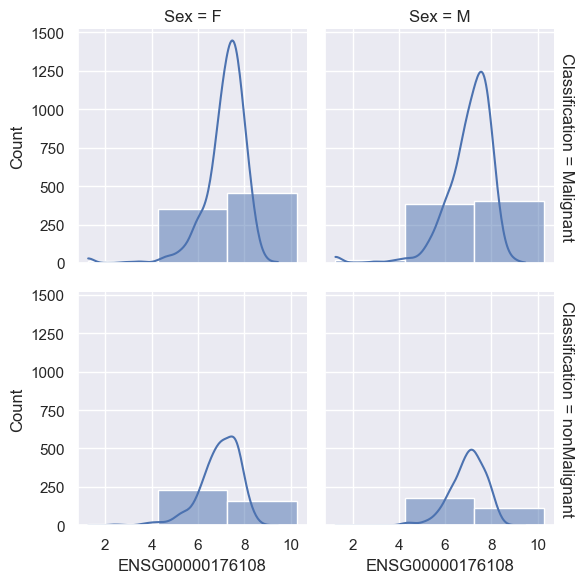

In [39]:
sns.set_theme(style="darkgrid")
graph = sns.displot(
    df_genes_labels, x=column_gene_name, col="Sex", row="Classification",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True), kde=True
)
plt.show()

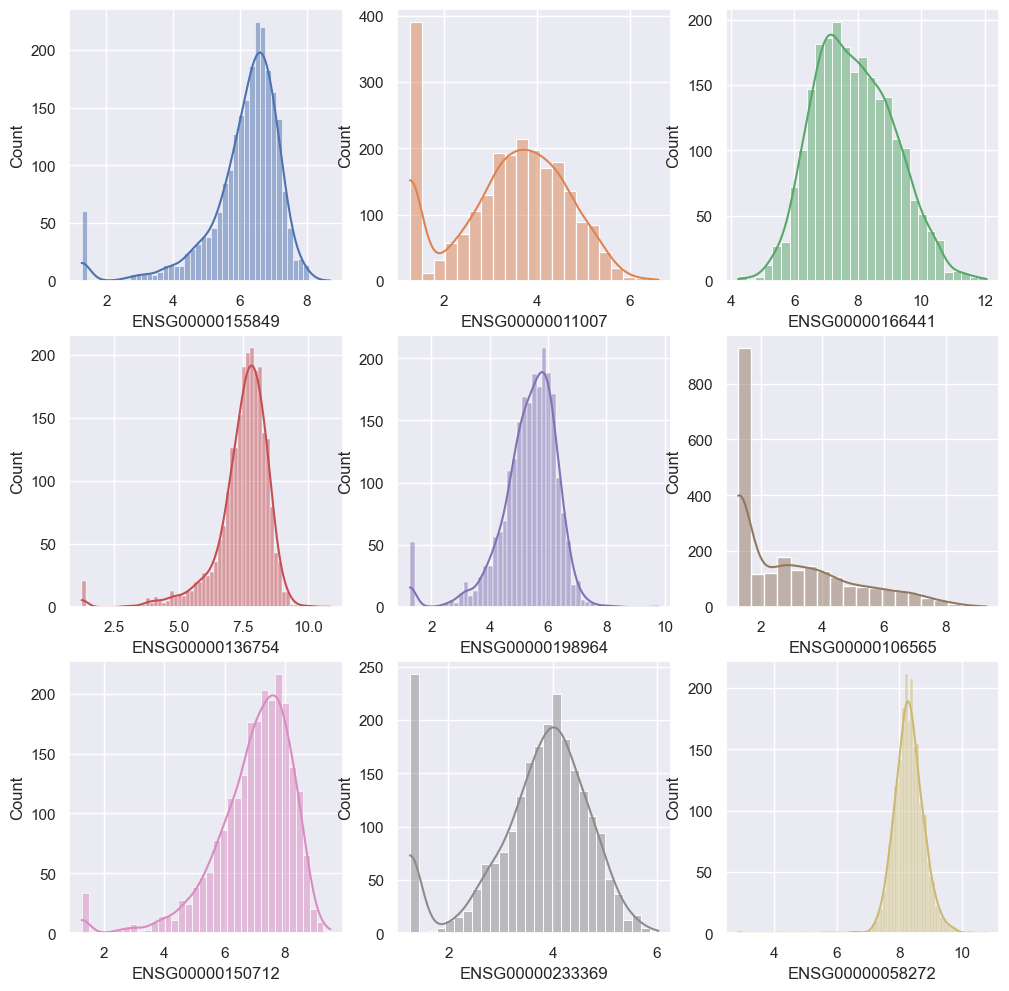

In [40]:
six_random_column = random.sample(df_genes_labels.columns.to_list(), 9)
sns.set(style="darkgrid")
palette = itertools.cycle(sns.color_palette())
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
sns.histplot(data=df_genes_labels, x=six_random_column[0], kde=True, color=next(palette), ax=axs[0, 0])
sns.histplot(data=df_genes_labels, x=six_random_column[1], kde=True, color=next(palette), ax=axs[0, 1])
sns.histplot(data=df_genes_labels, x=six_random_column[2], kde=True, color=next(palette), ax=axs[0, 2])
sns.histplot(data=df_genes_labels, x=six_random_column[3], kde=True, color=next(palette), ax=axs[1, 0])
sns.histplot(data=df_genes_labels, x=six_random_column[4], kde=True, color=next(palette), ax=axs[1, 1])
sns.histplot(data=df_genes_labels, x=six_random_column[5], kde=True, color=next(palette), ax=axs[1, 2])
sns.histplot(data=df_genes_labels, x=six_random_column[6], kde=True, color=next(palette), ax=axs[2, 0])
sns.histplot(data=df_genes_labels, x=six_random_column[7], kde=True, color=next(palette), ax=axs[2, 1])
sns.histplot(data=df_genes_labels, x=six_random_column[8], kde=True, color=next(palette), ax=axs[2, 2])
plt.show()

In [41]:
df_genes_labels.columns[:5440]

Index(['ENSG00000000419', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000001036', 'ENSG00000001461', 'ENSG00000001497',
       'ENSG00000001629', 'ENSG00000001631', 'ENSG00000002330',
       'ENSG00000002549',
       ...
       'ENSG00000267279', 'ENSG00000267316', 'ENSG00000268555',
       'ENSG00000269028', 'ENSG00000270055', 'ENSG00000271043',
       'ENSG00000272053', 'ENSG00000272168', 'ENSG00000272369',
       'ENSG00000272888'],
      dtype='object', length=5440)

In [42]:
# The Kolmogorov-Smirnov test tests the null hypothesis that the data was drawn from a normal distribution.
# It is similar in this case to the Shapiro Wilk test, but the main difference with it lies in the number of samples.
# While the Shapiro Wilk test can be used with up to 50 data, the Kolmogorov Smirnov test is recommended for more than 50 observations.

dist_norm_genes = []

for column in df_genes_labels.columns[:5440]:
    kstest_result = kstest(df_genes_labels[column], 'norm')    
    if kstest_result.pvalue > .5:
        dist_norm_genes.append([column, kstest_result.statistic, kstest_result.pvalue])

print(f"Number of genes with pvalues greater than 0.5: {len(dist_norm_genes)}")

Number of genes with pvalues greater than 0.5: 0


#### As the above graphs show, most of the genes do not have a normal distribution. Therefore, to determine correlations between them we will use Spearman's method.

Reference: https://practicaldatascience.co.uk/data-science/how-to-calculate-spearmans-rank-correlation-in-pandas

In [43]:
df_genes_labels[['Classification', 'Patient_group', 'Center',
 'Source', 'Cell_type', 'Group', 'Stage', 'Sex']] = df_genes_labels[['Classification', 'Patient_group', 'Center',
  'Source', 'Cell_type', 'Group', 'Stage', 'Sex']].apply(lambda x: pd.factorize(x)[0])
df_genes_labels.iloc[:, 5440:].head(5)

,Classification,Patient_group,Center,Source,Cell_type,Group,Stage,Sex,Age
Vumc-HD-101-TR922,0,0,0,0,0,0,-1,0,35.0
Vumc-HD-103-TR923,0,0,0,1,0,0,-1,0,54.0
Vumc-HD-108-TR924,0,0,0,2,0,0,-1,0,56.0
Vumc-HD-127-TR925,0,0,0,3,0,0,-1,0,52.0
Vumc-HD-130-TR926,0,0,0,4,0,0,-1,0,57.0


In [44]:
def calc_corr_and_save (data_frame, corr_file_path, corr_method):
    spearman_path = corr_file_path
    if not os.path.exists(spearman_path):
        corr = data_frame.corr(method=corr_method, numeric_only = False, min_periods=1)
        corr.to_pickle(spearman_path)
    else:
        corr = pd.read_pickle(spearman_path)
    return corr

In [45]:
corr = calc_corr_and_save(df_genes_labels, "Data/spearman_corr_tmm.pkl", "spearman")

Text(0.5, 1.0, 'Median Income vs Median House Value')

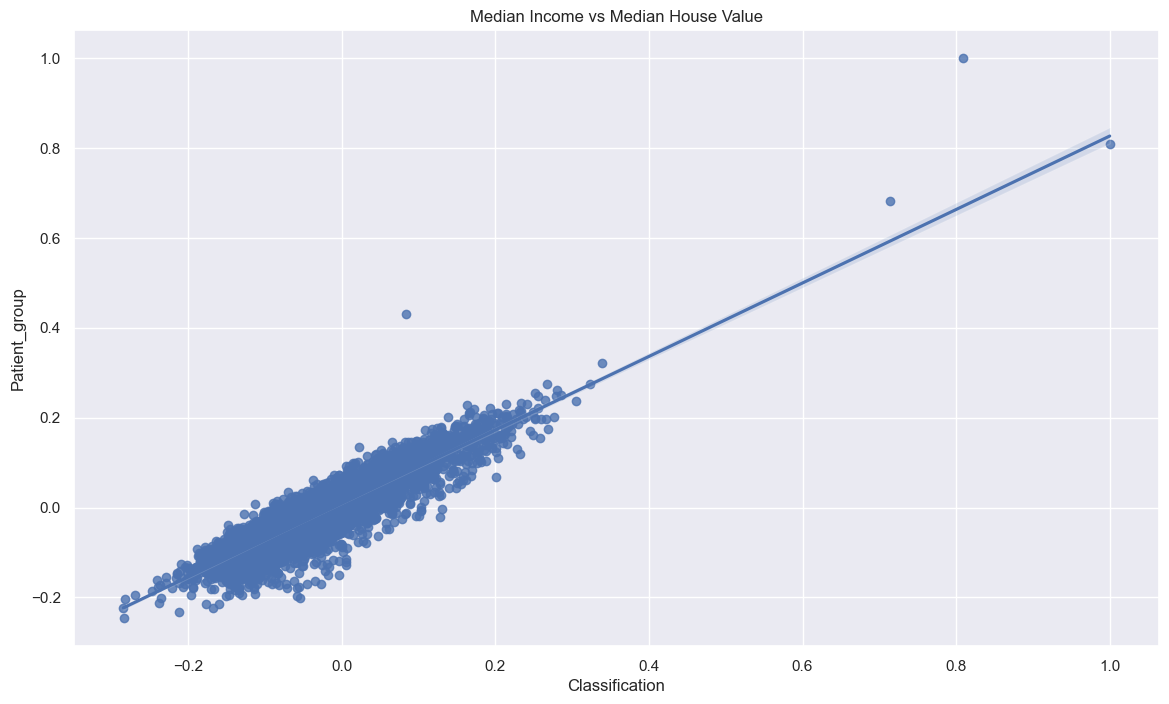

In [ ]:
plt.figure(figsize=(14,8))
sns.regplot(x='Classification', y='ENSG00000000419', data=corr)
plt.title('Median Income vs Median House Value')

In [50]:
# Selecting the upper traingular.
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
# Selecting the columns which are having absolute correlation greater than 0.70
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
print(len(to_drop))

1611


In [51]:
df_to_drop = corr.loc[to_drop][to_drop]
df_to_drop

,ENSG00000005020,ENSG00000005059,ENSG00000005249,ENSG00000005955,ENSG00000006007,ENSG00000007392,ENSG00000008988,ENSG00000009790,ENSG00000010256,ENSG00000010278,...,ENSG00000266401,ENSG00000266714,ENSG00000267279,ENSG00000267316,ENSG00000269028,ENSG00000271043,ENSG00000272053,Patient_group,Stage,Sex
ENSG00000005020,1.000000,-0.634231,0.819915,-0.694001,0.703812,-0.664079,-0.636606,-0.740743,-0.684284,0.632197,...,0.538537,-0.656861,0.523839,0.631795,0.224027,0.229595,0.607938,-0.021378,-0.012217,-0.120793
ENSG00000005059,-0.634231,1.000000,-0.691397,0.670259,-0.488984,0.623593,0.625430,0.780284,0.696573,-0.548848,...,-0.354634,0.605066,-0.470122,-0.454674,-0.232737,-0.232698,-0.516872,-0.116324,-0.112685,0.040198
ENSG00000005249,0.819915,-0.691397,1.000000,-0.737514,0.742196,-0.678209,-0.697124,-0.752643,-0.723613,0.709815,...,0.434447,-0.657964,0.474732,0.520943,0.178058,0.191283,0.482410,-0.047610,-0.059551,-0.045548
ENSG00000005955,-0.694001,0.670259,-0.737514,1.000000,-0.620316,0.706673,0.712739,0.745929,0.637079,-0.626073,...,-0.438124,0.676155,-0.485385,-0.487529,-0.117080,-0.124970,-0.530208,-0.077149,-0.015421,0.051913
ENSG00000006007,0.703812,-0.488984,0.742196,-0.620316,1.000000,-0.591524,-0.644862,-0.612854,-0.529829,0.610647,...,0.362103,-0.553160,0.333894,0.406833,0.006046,0.013929,0.352414,-0.015726,-0.055923,-0.054401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000271043,0.229595,-0.232698,0.191283,-0.124970,0.013929,-0.161867,0.132853,-0.220765,-0.284174,0.124126,...,0.231179,-0.224446,0.366607,0.351302,0.966793,1.000000,0.303416,-0.149533,-0.089018,-0.018827
ENSG00000272053,0.607938,-0.516872,0.482410,-0.530208,0.352414,-0.516701,-0.381532,-0.592595,-0.534388,0.404616,...,0.632710,-0.534957,0.684383,0.645074,0.305406,0.303416,1.000000,0.059131,0.048519,-0.106480
Patient_group,-0.021378,-0.116324,-0.047610,-0.077149,-0.015726,-0.063492,-0.160832,-0.112506,-0.005348,-0.092833,...,-0.052646,-0.042677,-0.019229,-0.156689,-0.126919,-0.149533,0.059131,1.000000,0.682881,0.022637
Stage,-0.012217,-0.112685,-0.059551,-0.015421,-0.055923,-0.013313,-0.100252,-0.091253,-0.039332,-0.088997,...,-0.060834,-0.012120,-0.027869,-0.107451,-0.069645,-0.089018,0.048519,0.682881,1.000000,-0.026322


In [52]:
#plt.figure(figsize=(14,8))
#sns.heatmap(df_to_drop.loc[df_to_drop.index.to_list(), df_to_drop.index.to_list()], annot=True, cmap='Blues')
#plt.show()

In [53]:
# droping the columns which are in the list 'to_drop' from the dataframe upper_tri
df_genes_labels_clean = df_genes_labels.drop(to_drop, axis=1, inplace=False)
print(df_genes_labels_clean.shape)

(2327, 3838)


In [54]:
corr_class = corr["Classification"].sort_values(ascending=False)
corr_class

Classification     1.000000
Patient_group      0.808553
Stage              0.713884
Age                0.338399
ENSG00000142089    0.323399
                     ...   
ENSG00000240225   -0.282042
ENSG00000130948   -0.283730
ENSG00000111196   -0.284390
Center                  NaN
Cell_type               NaN
Name: Classification, Length: 5449, dtype: float64

In [55]:
threshold_p_value = .3
corr_class = corr_class.loc[(corr_class > threshold_p_value) | (corr_class < threshold_p_value * -1)]
print(len(corr_class))
corr_class

6


Classification     1.000000
Patient_group      0.808553
Stage              0.713884
Age                0.338399
ENSG00000142089    0.323399
ENSG00000213465    0.305267
Name: Classification, dtype: float64

In [56]:
corr_group = corr["Patient_group"].sort_values(ascending=False)
corr_group

Patient_group      1.000000
Classification     0.808553
Stage              0.682881
Group              0.430152
Age                0.321843
                     ...   
ENSG00000177954   -0.223477
ENSG00000177410   -0.232085
ENSG00000130948   -0.246340
Center                  NaN
Cell_type               NaN
Name: Patient_group, Length: 5449, dtype: float64

In [57]:
corr_group = corr_group.loc[(corr_group > threshold_p_value) | (corr_group < threshold_p_value * -1)]
print(len(corr_group))
corr_group

5


Patient_group     1.000000
Classification    0.808553
Stage             0.682881
Group             0.430152
Age               0.321843
Name: Patient_group, dtype: float64

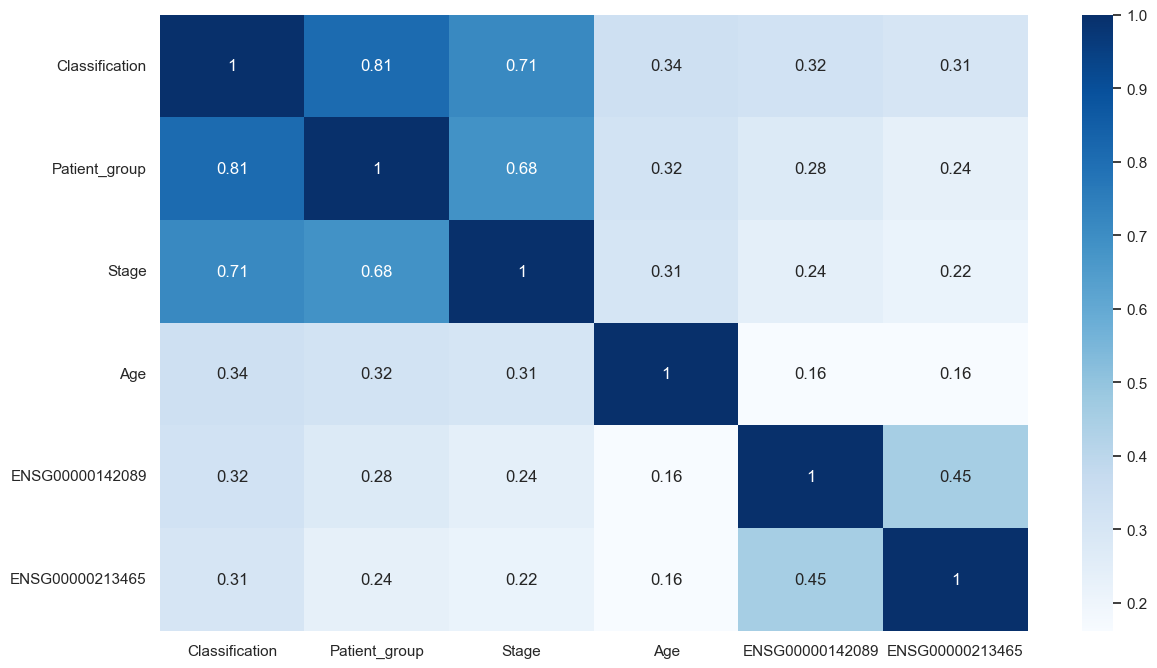

In [58]:
# Heatmaps with the 13 (over .3 in spearman p_value) variables correlated with classification
plt.figure(figsize=(14,8))
sns.heatmap(corr.loc[corr_class.index.to_list(), corr_class.index.to_list()], annot=True, cmap='Blues')
plt.show()

In [59]:
#Remove Nan values
df_genes_labels.isna().sum()

ENSG00000000419     0
ENSG00000000460     0
ENSG00000000938     0
ENSG00000001036     0
ENSG00000001461     0
                   ..
Cell_type           0
Group               0
Stage               0
Sex                 0
Age                23
Length: 5449, dtype: int64

In [60]:
df_genes_labels_tmp = df_genes_labels.drop(['Age'], axis=1)
df_genes_labels_tmp.isna().sum().sum()

0

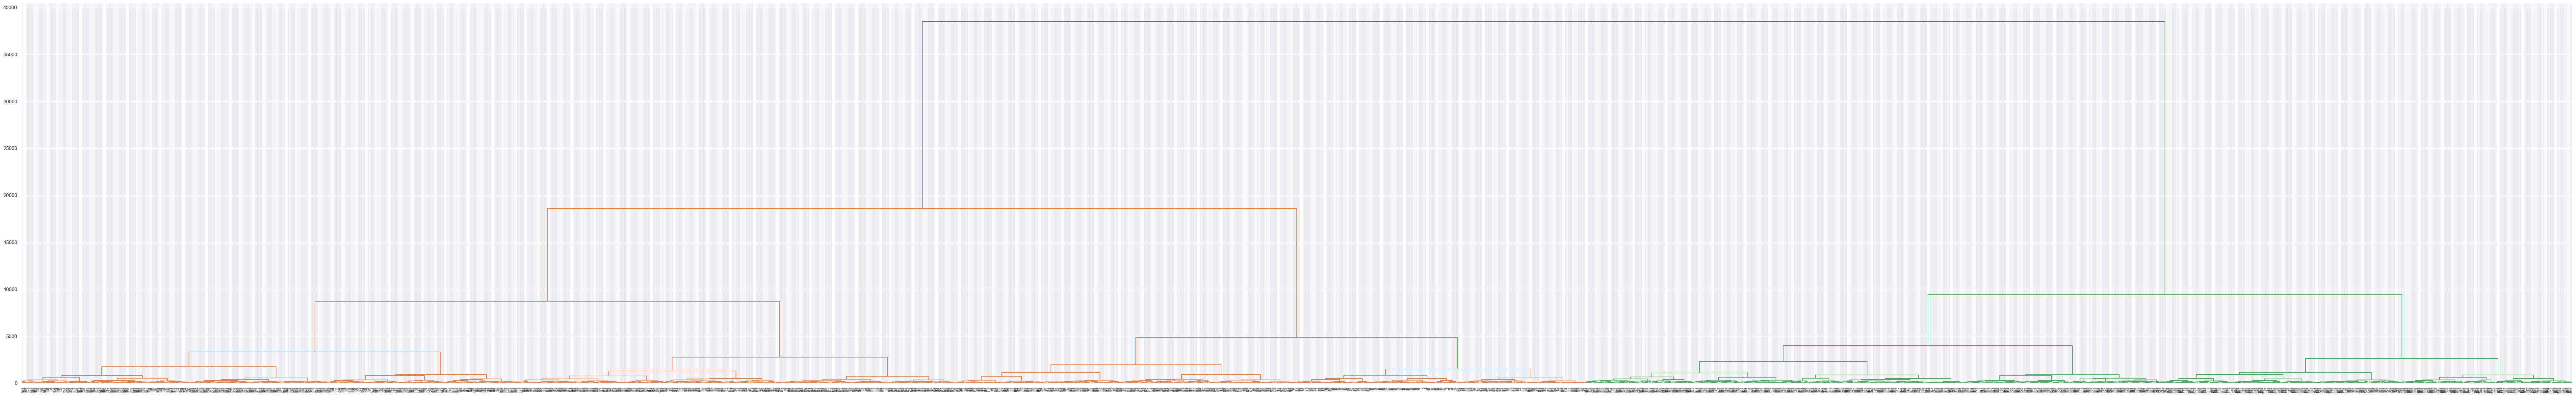

In [61]:
linked = linkage(df_genes_labels_tmp, 'ward')
plt.figure(figsize=(100, 15))
dendrogram(linked,
            orientation='top',
            #labels=target,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

## DBSCAN analysis

References:  
https://ideasbyjin.github.io/post/2019-12-18-clustering-2/   
https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc


In [98]:
df_genes_labels.head(5)

,ENSG00000000419,ENSG00000000460,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001497,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,...,ENSG00000272888,Classification,Patient_group,Center,Source,Cell_type,Group,Stage,Sex,Age
Vumc-HD-101-TR922,2.420696,2.833454,4.051932,4.635914,5.490647,3.054869,4.797977,4.244210,5.024493,5.392543,...,4.998049,0,0,0,0,0,0,-1,0,35.0
Vumc-HD-103-TR923,5.465979,2.942949,7.493358,4.740857,3.510172,4.558505,3.698348,5.704241,4.590543,5.816862,...,5.159225,0,0,0,1,0,0,-1,0,54.0
Vumc-HD-108-TR924,5.524734,4.185768,7.986971,3.774459,3.416138,3.514401,6.207034,4.881894,3.774459,6.236125,...,4.881894,0,0,0,2,0,0,-1,0,56.0
Vumc-HD-127-TR925,7.168787,4.159768,6.079284,5.398897,3.626070,4.067668,4.405301,5.542675,4.960615,5.576487,...,4.615061,0,0,0,3,0,0,-1,0,52.0
Vumc-HD-130-TR926,6.538326,3.042690,6.897657,4.740889,4.316425,3.480415,4.244143,5.674690,5.263894,6.748875,...,5.530194,0,0,0,4,0,0,-1,0,57.0


In [62]:
#Check tha range of the TPM values
#df_genes_labels_t = df_genes_labels.T
vals = df_genes_labels[df_genes_labels.columns[:5440]].astype(float).values
vals

array([[2.42069559, 2.83345447, 4.05193229, ..., 5.02449312, 4.28852597,
        4.99804865],
       [5.46597927, 2.94294893, 7.49335837, ..., 3.69834826, 4.59054261,
        5.15922484],
       [5.52473386, 4.18576831, 7.98697084, ..., 3.41613839, 4.35444836,
        4.88189402],
       ...,
       [4.23449952, 6.87500666, 8.22825481, ..., 1.26211002, 2.59659575,
        4.23449952],
       [5.75619074, 3.59489501, 8.19442013, ..., 2.4922657 , 2.4922657 ,
        4.44409321],
       [1.26211002, 3.10640045, 6.48207933, ..., 6.01205344, 3.89007305,
        5.06469772]])

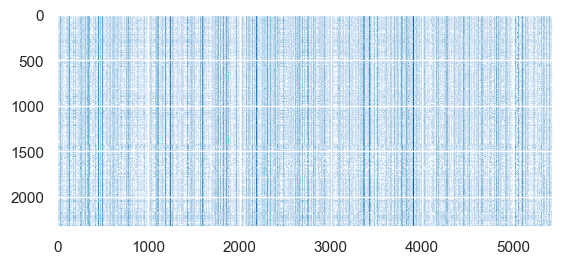

In [63]:
# Let's plot a heatmap first, as it's a matrix
plt.imshow(vals, interpolation='nearest', cmap = 'Blues')

Min: 1.26211002304389, Max: 18.6934012355192, Mean: 5.215331393871522, Median: 5.14643723406575


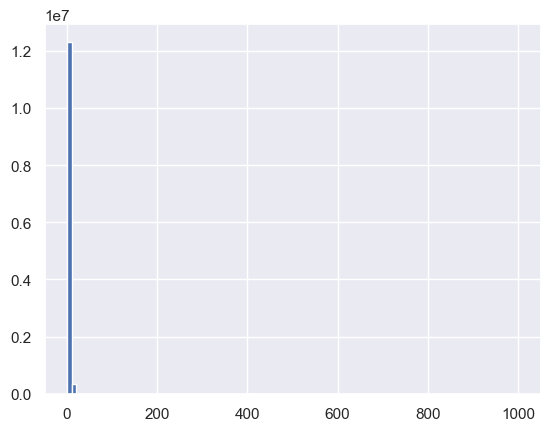

In [64]:
# Flatten to a 1-dimensional vector.
valarray = vals.flatten()

min_tmm = np.min(valarray)
max_tmm = np.max(valarray)
mean_tmm = np.mean(valarray)
median_tmm = np.median(valarray)

# Draw the histogram
o = plt.hist(valarray, bins = np.arange(0, 1001, 10))

print("Min: {}, Max: {}, Mean: {}, Median: {}".format(min_tmm, max_tmm, mean_tmm, median_tmm))

Min: 0.8162980162298403, Max: 2.980283616967419, Mean: 1.7510070425042135, Median: 1.8158726024186411


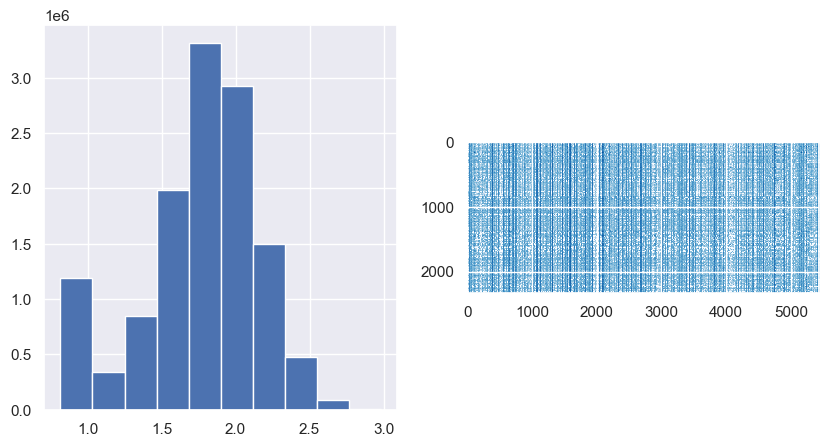

In [65]:
logTmm = np.log(vals+1)

logTmmArray = logTmm.flatten()

min_tmm = np.min(logTmmArray)
max_tmm = np.max(logTmmArray)
mean_tmm = np.mean(logTmmArray)
median_tmm = np.median(logTmmArray)
print("Min: {}, Max: {}, Mean: {}, Median: {}".format(min_tmm, max_tmm, mean_tmm, median_tmm))

fig, ax = plt.subplots(1,2)
ax[0].hist(logTmmArray)
ax[1].imshow(logTmm, interpolation='nearest', cmap = 'Blues')

fig.set_size_inches((10,5))

In [66]:
# pairwise distances - use default of Euclidean though there are various ways of doing this
# This will take a while since there's ~3000 pairwise distances to compute.
dmat = pdist(logTmm)

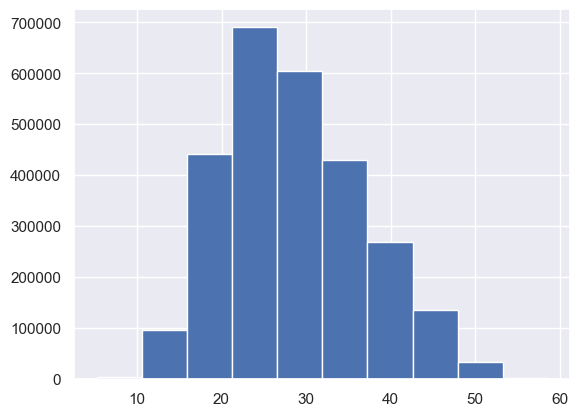

In [67]:
# Let's look at the distribution of distances
o = plt.hist(dmat)

In [68]:
# Convert distance matrix from pdist into a square matrix
sqmat = squareform(dmat)

In [69]:
# Initialise an MDS object, this allows us to visualise points in space
mds = MDS(dissimilarity='precomputed')

In [70]:
# This step can take a while
mds_coords_path = 'Data/mds_coords_tmm.npy'
if not os.path.exists(mds_coords_path):
    np.random.seed(0)
    coords = mds.fit_transform(sqmat)
    np.save(mds_coords_path, coords)
else:
    coords = np.load(mds_coords_path)

c:\Users\Edel\.virtualenvs\Desarrollo-OyWcDdAp\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



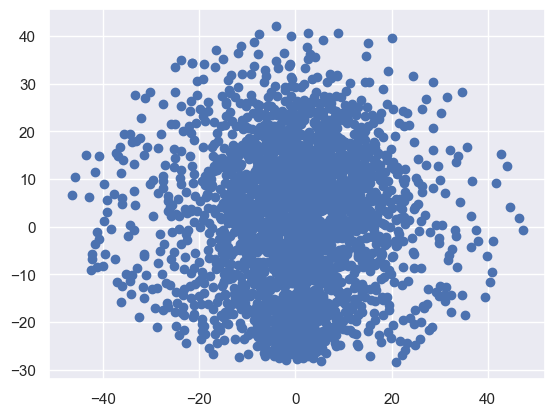

In [71]:
plt.scatter(coords[:,0], coords[:,1])
plt.show()

In [72]:
def fit_dbscan(metric, eps, min_samples):
    dbscan = DBSCAN(metric=metric, eps = eps, min_samples = min_samples)
    dbscan.fit(sqmat)

    print(dbscan.labels_.shape)

    print(set(dbscan.labels_))

    unique, counts = np.unique(dbscan.labels_, return_counts=True)
    print( dict(zip(unique, counts)) )
    return dbscan

In [89]:
THRESHOLD = 35
min_samples = 4
dbscan = fit_dbscan('precomputed', THRESHOLD, min_samples)

(2327,)
{0, -1}
{-1: 84, 0: 2243}


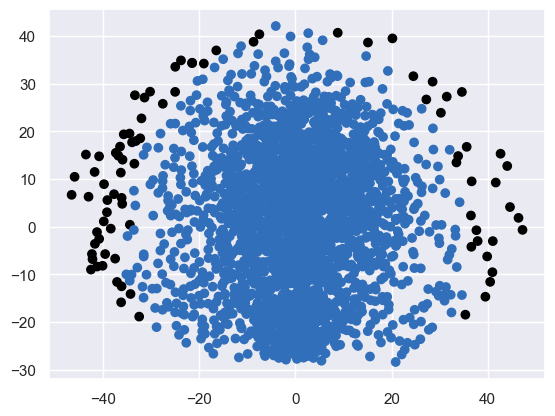

In [93]:
# Colour points based on cluster membership
cols = {0: '#316fba', -1:'black'}
colours = [ cols[c] for c in dbscan.labels_ ]

# Now let's see what the clusters look like
plt.scatter(coords[:,0], coords[:,1], c = colours)
plt.show()

In [94]:
sample_ids_used = df_genes_labels.index
sample_id_to_smts = df_genes_labels['Classification']
class_represented = {0: set(), -1: set()}

for i, label in enumerate(dbscan.labels_):        
    sample_id = sample_ids_used[i]
    class_sample = sample_id_to_smts[sample_id]
    
    class_represented[label].add(class_sample)

In [95]:
class_represented

{0: {0, 1}, -1: {0, 1}}

#### Reduces the dimension of the input features (genes). Data without outliers.

In [96]:
# Remove outliers
outliers_index = np.where(dbscan.labels_ == -1)[0]
print(len(outliers_index))
df_genes_labels_clean = df_genes_labels.drop(df_genes_labels.index[outliers_index])

84


In [97]:
df_genes_labels_clean.shape

(2243, 5449)

In [79]:
#save dataframe
df_genes_labels_file = "Data/without_outliers/df_genes_labels_without_outliers_tmm.pkl"
if not os.path.exists(df_genes_labels_file):
    df_genes_labels_clean.to_pickle(df_genes_labels_file)

Apply T-SNE to search outliers inner the samples

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 2243 samples in 0.150s...
[t-SNE] Computed neighbors for 2243 samples in 0.888s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2243
[t-SNE] Computed conditional probabilities for sample 2000 / 2243
[t-SNE] Computed conditional probabilities for sample 2243 / 2243
[t-SNE] Mean sigma: 19.556220
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.983429
[t-SNE] KL divergence after 2500 iterations: 1.699233


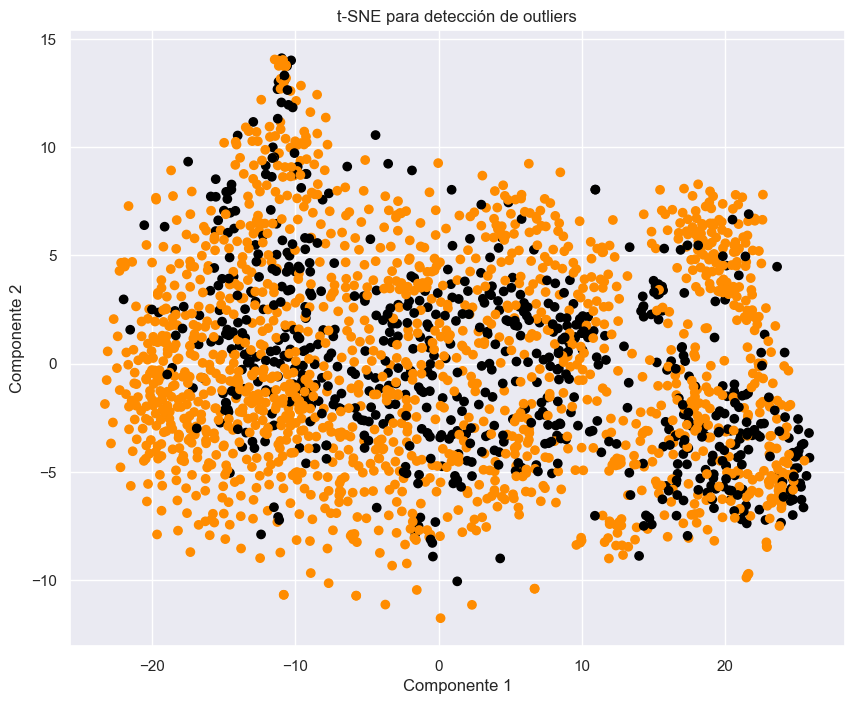

In [145]:
gene_expression = df_genes_labels_clean.iloc[:, :5440]
class_labels = df_genes_labels_clean.iloc[:, 5440:5441].to_numpy().flatten()

tsne = TSNE(n_components=2, verbose=1, perplexity=45, random_state=42, learning_rate=100.0, init='random', n_iter=4000)
X_tsne = tsne.fit_transform(gene_expression)

tsne_df = pd.DataFrame(data=X_tsne, columns=['Componente 1', 'Componente 2'])

plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Componente 1'], tsne_df['Componente 2'], c=class_labels, cmap = mcolors.ListedColormap(["black", "darkorange"]))
plt.title('t-SNE para detección de outliers')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

[Text(0.5, 1.0, 'tSNE')]

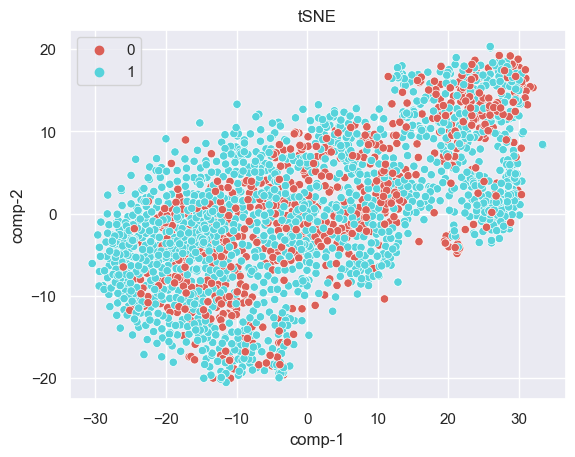

In [108]:
df_z = pd.DataFrame()
df_z["y"] = class_labels
df_z["comp-1"] = z[:,0]
df_z["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df_z.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df_z).set(title="tSNE") 

In [80]:
df_genes_labels_clean[["Classification", "Patient_group"]].groupby("Patient_group").agg( {
        "Classification": ["value_counts"]
    })

,,Classification
,,value_counts
Patient_group,Classification,
0,0,700
1,1,132
2,1,510
3,1,125
4,1,93
5,1,101
6,1,68
7,1,141


In [81]:
# Select feature without outliers

gene_expression = df_genes_labels_clean.iloc[:, :5440]
gene_expression = np.asarray(gene_expression.values)
class_labels = df_genes_labels_clean.iloc[:, 5440:5441].to_numpy().flatten()
#splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(gene_expression, class_labels, test_size=0.40, random_state=42, stratify=class_labels)

In [82]:
#filter technique (Mutual Information [MI])
mi = mutual_info_classif(X_train, y_train, discrete_features='auto', n_neighbors=3, copy=True, random_state=42)

In [83]:
# Remove zero values
gains = np.asarray(mi)
indexes = np.where(gains != 0)[0]
print(len(indexes))
gains.shape

3674


(5440,)

In [ ]:
# Estimate best hyperparams to SVC
# defining parameter range
param_grid = {'C': [1, 10, 100, 1000], 'tol': [0.1, 0.01, 0.001, 0.0001, 1e-4, 1e-5, 1e-6],
               'dual':[True], 'multi_class':['ovr', 'crammer_singer'],  'class_weight': ('balanced', 'None')}   
grid = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 1, scoring='roc_auc')

it = sorted(range(len(gains)), key = lambda sub: gains[sub])[-100:]
X_train, X_test, y_train, y_test = train_test_split(gene_expression, class_labels, test_size=0.40, random_state=42, stratify=class_labels)
x_train = X_train[:, it]
Y_train = y_train[:]

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    grid.fit(x_train, Y_train)

In [ ]:
# print best score
print(grid.best_score_)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

0.7843575755233022
{'C': 10, 'class_weight': 'balanced', 'dual': True, 'multi_class': 'ovr', 'tol': 0.1}
LinearSVC(C=10, class_weight='balanced', tol=0.1)


In [ ]:
def get_svc_model():
    return LinearSVC(random_state=42, dual=True, C=1000, tol=0.00001, class_weight='balanced')

In [ ]:
def split_df():
    X_train, X_test, y_train, y_test = train_test_split(gene_expression, class_labels, test_size=0.40, random_state=42, stratify=class_labels)
    return X_train, X_test, y_train, y_test

In [ ]:
# Traingin a linearSVC model with different numbers of MI features starting from the top 2 to the top 1000
# the highest accuracy corresponds to the best number of features
graph_MI = []
X_train, X_test, y_train, y_test = split_df()

TotalTime = time.time()
for i in range (2,500):  
    it = sorted(range(len(gains)), key = lambda sub: gains[sub])[-i:]
    x_train = X_train[:, it]
    x_test = X_test[:, it]
    Y_train = y_train[:]
    Y_test = y_test[:]
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    clf = get_svc_model()
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        clf.fit(x_train, Y_train)
    scores = clf.score(x_test, Y_test)
    endTime = time.time()
    y_pred = clf.predict(x_test)
    graph_MI.append(scores)
EndTime = time.time()
print('TotalTime: ' + str(EndTime - TotalTime))

TotalTime: 336.24225187301636


Text(0, 0.5, 'Accuracy')

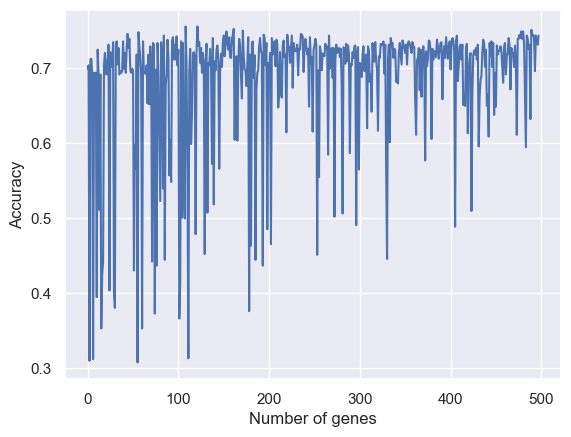

In [ ]:
#Plot a graph with all accuracy scores
plt.plot(graph_MI)
plt.xlabel('Number of genes')
plt.ylabel('Accuracy')

In [ ]:
#Display the best number of features
graph_MI = np.asarray(graph_MI)
print(np.argmax(graph_MI))
print(graph_MI[np.argmax(graph_MI)]) 
print(np.where(graph_MI == graph_MI[np.argmax(graph_MI)]))

#Since the counting started from 2 in the for loop, 2 should be added to those numbers
#In other words, the least number of features that can generate top accuracy is 19 not 17

108
0.7560706401766004
(array([108, 121], dtype=int64),)
